In [12]:
import traceback
import sys,glob
import os.path

import numpy
from datetime import date
import netCDF4
import time
from numba import njit
# from rasotools.utils import *
# from rasotools.anomaly import *
import matplotlib.pylab as plt
import scipy.stats
import f90nml
import xarray as xr
sys.path.append('../../cds-backend/code/')
import cds_eua3 as eua
import cdsapi
import urllib3
import json
import h5py
import zipfile, os

In [13]:
c = cdsapi.Client()
r = c.retrieve('insitu-comprehensive-upper-air-observation-network',
               {'variable': 'wind_direction',
                'optional':['wind_bias_estimate'],
                'statid': '35229',
                'skip':'8kla',
                'pressure_level':[10,20,30,50,70,100,150,200,250,300,400,500,700,850,925,1000]
               }
              )
r.download(target='download.zip')
assert os.stat('download.zip').st_size == r.content_length, "Downloaded file is incomplete"
z = zipfile.ZipFile('download.zip')
z.extractall(path='./tocompare/wind/cds_1')
z.close()
cdsfile = glob.glob('./tocompare/wind/cds_1/*.nc')
cdsdata=eua.CDMDataset(cdsfile[0])#.to_dataframe()

2021-05-06 10:11:52,490 INFO Welcome to the CDS
2021-05-06 10:11:52,491 INFO Sending request to https://sis-dev.climate.copernicus.eu/api/v2/resources/insitu-comprehensive-upper-air-observation-network
2021-05-06 10:11:52,906 INFO Request is queued
2021-05-06 10:11:53,943 INFO Request is running
2021-05-06 10:11:55,482 INFO Request is completed
2021-05-06 10:11:55,615 INFO Downloading http://136.156.132.176/cache-compute-0000/cache/data2/adaptor.comprehensive_upper_air.retrieve-1620288714.0411232-32415-6-640afbef-81d3-4010-8e2f-f8b806062f74.zip to download.zip (9.3M)
2021-05-06 10:11:56,892 INFO Download rate 7.3M/s   


In [17]:
dldata = cdsdata.to_dataframe()

2021-05-06 10:13:13,024 INFO Reading Profile on slice(None, None, None)


In [23]:
dldata

,lat,lon,plev,report_id,station_id,time,trajectory_label,wind_bias_estimate,wind_from_direction
0,50.279999,57.150002,85000.0,20000000094,AKTOBE,1950-05-14 02:00:00,nnnnnnnnnnnnnn,-1.297102,200.0
1,50.279999,57.150002,85000.0,20000000096,AKTOBE,1950-05-15 02:00:00,nnnnnnnnnnnnnn,-1.297102,270.0
2,50.279999,57.150002,70000.0,20000000100,AKTOBE,1950-05-16 14:00:00,nnnnnnnnnnnnnn,-1.297102,70.0
3,50.279999,57.150002,85000.0,20000000100,AKTOBE,1950-05-16 14:00:00,nnnnnnnnnnnnnn,-1.297102,70.0
4,50.283298,57.150002,70000.0,30000001156,AKTOBE,1950-05-16 17:00:00,nnnnnnnnnnnnnn,-1.297102,70.0
...,...,...,...,...,...,...,...,...,...
541294,50.259998,57.220001,50000.0,10000029410,AKTOBE,2020-12-31 12:00:00,nnnnnnnnnnnnnn,0.000000,310.0
541295,50.259998,57.220001,70000.0,10000029410,AKTOBE,2020-12-31 12:00:00,nnnnnnnnnnnnnn,0.000000,320.0
541296,50.259998,57.220001,85000.0,10000029410,AKTOBE,2020-12-31 12:00:00,nnnnnnnnnnnnnn,0.000000,315.0
541297,50.259998,57.220001,92500.0,10000029410,AKTOBE,2020-12-31 12:00:00,nnnnnnnnnnnnnn,0.000000,265.0


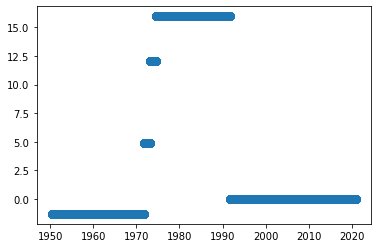

In [22]:
fig, ax = plt.subplots()
ax.scatter(dldata.time, dldata.wind_bias_estimate, label='CDS', s=50)

In [19]:
dldata

,lat,lon,plev,report_id,station_id,time,trajectory_label,wind_bias_estimate,wind_from_direction
0,50.279999,57.150002,85000.0,20000000094,AKTOBE,1950-05-14 02:00:00,nnnnnnnnnnnnnn,-1.297102,200.0
1,50.279999,57.150002,85000.0,20000000096,AKTOBE,1950-05-15 02:00:00,nnnnnnnnnnnnnn,-1.297102,270.0
2,50.279999,57.150002,70000.0,20000000100,AKTOBE,1950-05-16 14:00:00,nnnnnnnnnnnnnn,-1.297102,70.0
3,50.279999,57.150002,85000.0,20000000100,AKTOBE,1950-05-16 14:00:00,nnnnnnnnnnnnnn,-1.297102,70.0
4,50.283298,57.150002,70000.0,30000001156,AKTOBE,1950-05-16 17:00:00,nnnnnnnnnnnnnn,-1.297102,70.0
...,...,...,...,...,...,...,...,...,...
541294,50.259998,57.220001,50000.0,10000029410,AKTOBE,2020-12-31 12:00:00,nnnnnnnnnnnnnn,0.000000,310.0
541295,50.259998,57.220001,70000.0,10000029410,AKTOBE,2020-12-31 12:00:00,nnnnnnnnnnnnnn,0.000000,320.0
541296,50.259998,57.220001,85000.0,10000029410,AKTOBE,2020-12-31 12:00:00,nnnnnnnnnnnnnn,0.000000,315.0
541297,50.259998,57.220001,92500.0,10000029410,AKTOBE,2020-12-31 12:00:00,nnnnnnnnnnnnnn,0.000000,265.0


In [8]:
ifile = glob.glob('/raid60/scratch/leo/scratch/converted_v5/*11035*')[0]
plist=[1000,2000,3000,5000,7000,10000,15000,20000,25000,30000,40000,50000,70000,85000,92500,100000]
data=eua.vm_request_wrapper({'variable': ['u_component_of_wind'],  
                                                                'optional':['wind_bias_estimate'],
                                                                'statid': '11035', 
                                                                'pressure_level':plist,
                                                                }, 
                                        overwrite=True,vm_url='http://srvx8.img.univie.ac.at:8002')

In [10]:
data.to_dataframe()

2021-05-06 09:58:43,080 INFO Reading Profile on slice(None, None, None)


,lat,lon,plev,report_id,station_id,time,trajectory_label,ua,wind_bias_estimate
0,48.248600,16.35640,70000.0,30000000849,WIEN/HOHE WARTE (11035-0),1949-02-08 04:00:00,nnnnnnnnnnnnnn,7.070663,-0.162648
1,48.248600,16.35640,85000.0,30000000849,WIEN/HOHE WARTE (11035-0),1949-02-08 04:00:00,nnnnnnnnnnnnnn,11.258330,-0.126527
2,48.248600,16.35640,100000.0,30000000849,WIEN/HOHE WARTE (11035-0),1949-02-08 04:00:00,nnnnnnnnnnnnnn,8.000000,-0.001467
3,48.248600,16.35640,50000.0,30000000850,WIEN/HOHE WARTE (11035-0),1949-02-10 03:00:00,nnnnnnnnnnnnnn,45.000000,-0.008251
4,48.248600,16.35640,70000.0,30000000850,WIEN/HOHE WARTE (11035-0),1949-02-10 03:00:00,nnnnnnnnnnnnnn,29.000000,-0.005318
...,...,...,...,...,...,...,...,...,...
970800,48.248951,16.35718,40000.0,10000056183,WIEN/HOHE WARTE (11035-0),2020-12-31 11:30:10,nnnnnnnnnnnnnn,10.142838,0.000000
970801,48.248951,16.35718,50000.0,10000056183,WIEN/HOHE WARTE (11035-0),2020-12-31 11:30:10,nnnnnnnnnnnnnn,6.882917,0.000000
970802,48.248951,16.35718,70000.0,10000056183,WIEN/HOHE WARTE (11035-0),2020-12-31 11:30:10,nnnnnnnnnnnnnn,3.912591,0.000000
970803,48.248951,16.35718,85000.0,10000056183,WIEN/HOHE WARTE (11035-0),2020-12-31 11:30:10,nnnnnnnnnnnnnn,1.102549,0.000000


In [11]:
cdsdata.to_dataframe()

2021-05-06 09:59:03,160 INFO Reading Profile on slice(None, None, None)


,lat,lon,plev,report_id,station_id,time,trajectory_label,ua,wind_bias_estimate
0,48.248600,16.35640,70000.0,30000000849,WIEN/HOHE WARTE (11035-0),1949-02-08 04:00:00,nnnnnnnnnnnnnn,7.070663,-0.162648
1,48.248600,16.35640,85000.0,30000000849,WIEN/HOHE WARTE (11035-0),1949-02-08 04:00:00,nnnnnnnnnnnnnn,11.258330,-0.126527
2,48.248600,16.35640,100000.0,30000000849,WIEN/HOHE WARTE (11035-0),1949-02-08 04:00:00,nnnnnnnnnnnnnn,8.000000,-0.001467
3,48.248600,16.35640,50000.0,30000000850,WIEN/HOHE WARTE (11035-0),1949-02-10 03:00:00,nnnnnnnnnnnnnn,45.000000,-0.008251
4,48.248600,16.35640,70000.0,30000000850,WIEN/HOHE WARTE (11035-0),1949-02-10 03:00:00,nnnnnnnnnnnnnn,29.000000,-0.005318
...,...,...,...,...,...,...,...,...,...
970800,48.248951,16.35718,40000.0,10000056183,WIEN/HOHE WARTE (11035-0),2020-12-31 11:30:10,nnnnnnnnnnnnnn,10.142838,0.000000
970801,48.248951,16.35718,50000.0,10000056183,WIEN/HOHE WARTE (11035-0),2020-12-31 11:30:10,nnnnnnnnnnnnnn,6.882917,0.000000
970802,48.248951,16.35718,70000.0,10000056183,WIEN/HOHE WARTE (11035-0),2020-12-31 11:30:10,nnnnnnnnnnnnnn,3.912591,0.000000
970803,48.248951,16.35718,85000.0,10000056183,WIEN/HOHE WARTE (11035-0),2020-12-31 11:30:10,nnnnnnnnnnnnnn,1.102549,0.000000


In [37]:
cdsdata.wind_bias_estimate[:]

array([-0.1626482 , -0.12652683, -0.00146675, ...,  0.        ,
        0.        ,  0.        ], dtype=float32)

In [3]:
plist=[1000,2000,3000,5000,7000,10000,15000,20000,25000,30000,40000,50000,70000,85000,92500,100000]

In [4]:
data=dict(zip(['d','u','v'],eua.vm_request_wrapper({'variable': ['wind_direction','u_component_of_wind','v_component_of_wind'],  
                                                                'optional':['obs_minus_bg','bias_estimate'],
                                                                'statid': '11035', 
                                                                'pressure_level':plist,
                                                                }, 
                                        overwrite=True,vm_url='http://srvx8.img.univie.ac.at:8002').values()))


VM Request failed {'variable': ['wind_direction', 'u_component_of_wind', 'v_component_of_wind'], 'optional': ['obs_minus_bg', 'bias_estimate'], 'statid': '11035', 'pressure_level': [1000, 2000, 3000, 5000, 7000, 10000, 15000, 20000, 25000, 30000, 40000, 50000, 70000, 85000, 92500, 100000]}


ConnectionError: HTTPConnectionPool(host='srvx8.img.univie.ac.at', port=8002): Max retries exceeded with url: / (Caused by NewConnectionError('<urllib3.connection.HTTPConnection object at 0x7f5ea0b9cf10>: Failed to establish a new connection: [Errno 111] Connection refused'))